In [9]:
#!pip install tensorflow

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import ticker
from statsmodels.tsa.stattools import adfuller, acf, pacf
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [11]:
train= pd.read_csv("D:/work/week3/train.csv")
train.head()

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [12]:
store = pd.read_csv("D:/work/week3/store.csv")
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [22]:
#Sales per StoreType

store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)
train_store=pd.merge(train,store,how='inner',on='Store')
train_store.fillna(0,inplace=True)
data = train_store[['StoreType','Date','Sales']]
scaler = MinMaxScaler()
data.head()

,StoreType,Date,Sales
0,c,2015-07-31,5263
1,c,2015-07-30,5020
2,c,2015-07-29,4782
3,c,2015-07-28,5011
4,c,2015-07-27,6102


In [24]:
df=data.groupby('Date')['Sales'].sum()
df=df.to_frame()
df.head()

,Sales
Date,
2013-01-01,97235
2013-01-02,6949829
2013-01-03,6347820
2013-01-04,6638954
2013-01-05,5951593


In [25]:

df.describe()

,Sales
count,9.420000e+02
mean,6.234799e+06
std,3.130536e+06
min,9.723500e+04
25%,5.675832e+06
50%,6.580354e+06
75%,8.174899e+06
max,1.562355e+07


In [26]:
#drop rows where Sales==0
df = df.loc[~(df['Sales'] == 0)]

In [27]:

scaler.fit(df.Sales.values.reshape([-1, 1]))
df_scaled = scaler.transform(df.Sales.values.reshape(-1, 1))
df['SalesScaled'] = df_scaled
df.tail(10)

,Sales,SalesScaled
Date,,
2015-07-22,6110388,0.387288
2015-07-23,6687068,0.424430
2015-07-24,6601325,0.418908
2015-07-25,6021666,0.381574
2015-07-26,285865,0.012149
2015-07-27,10707292,0.683360
2015-07-28,9115073,0.580810
2015-07-29,8499962,0.541193
2015-07-30,8798854,0.560443


Descriptive Statistics and Visualizations of the Data.

In [28]:
df.describe()

,Sales,SalesScaled
count,9.420000e+02,942.000000
mean,6.234799e+06,0.395301
std,3.130536e+06,0.201628
min,9.723500e+04,0.000000
25%,5.675832e+06,0.359300
50%,6.580354e+06,0.417557
75%,8.174899e+06,0.520256
max,1.562355e+07,1.000000


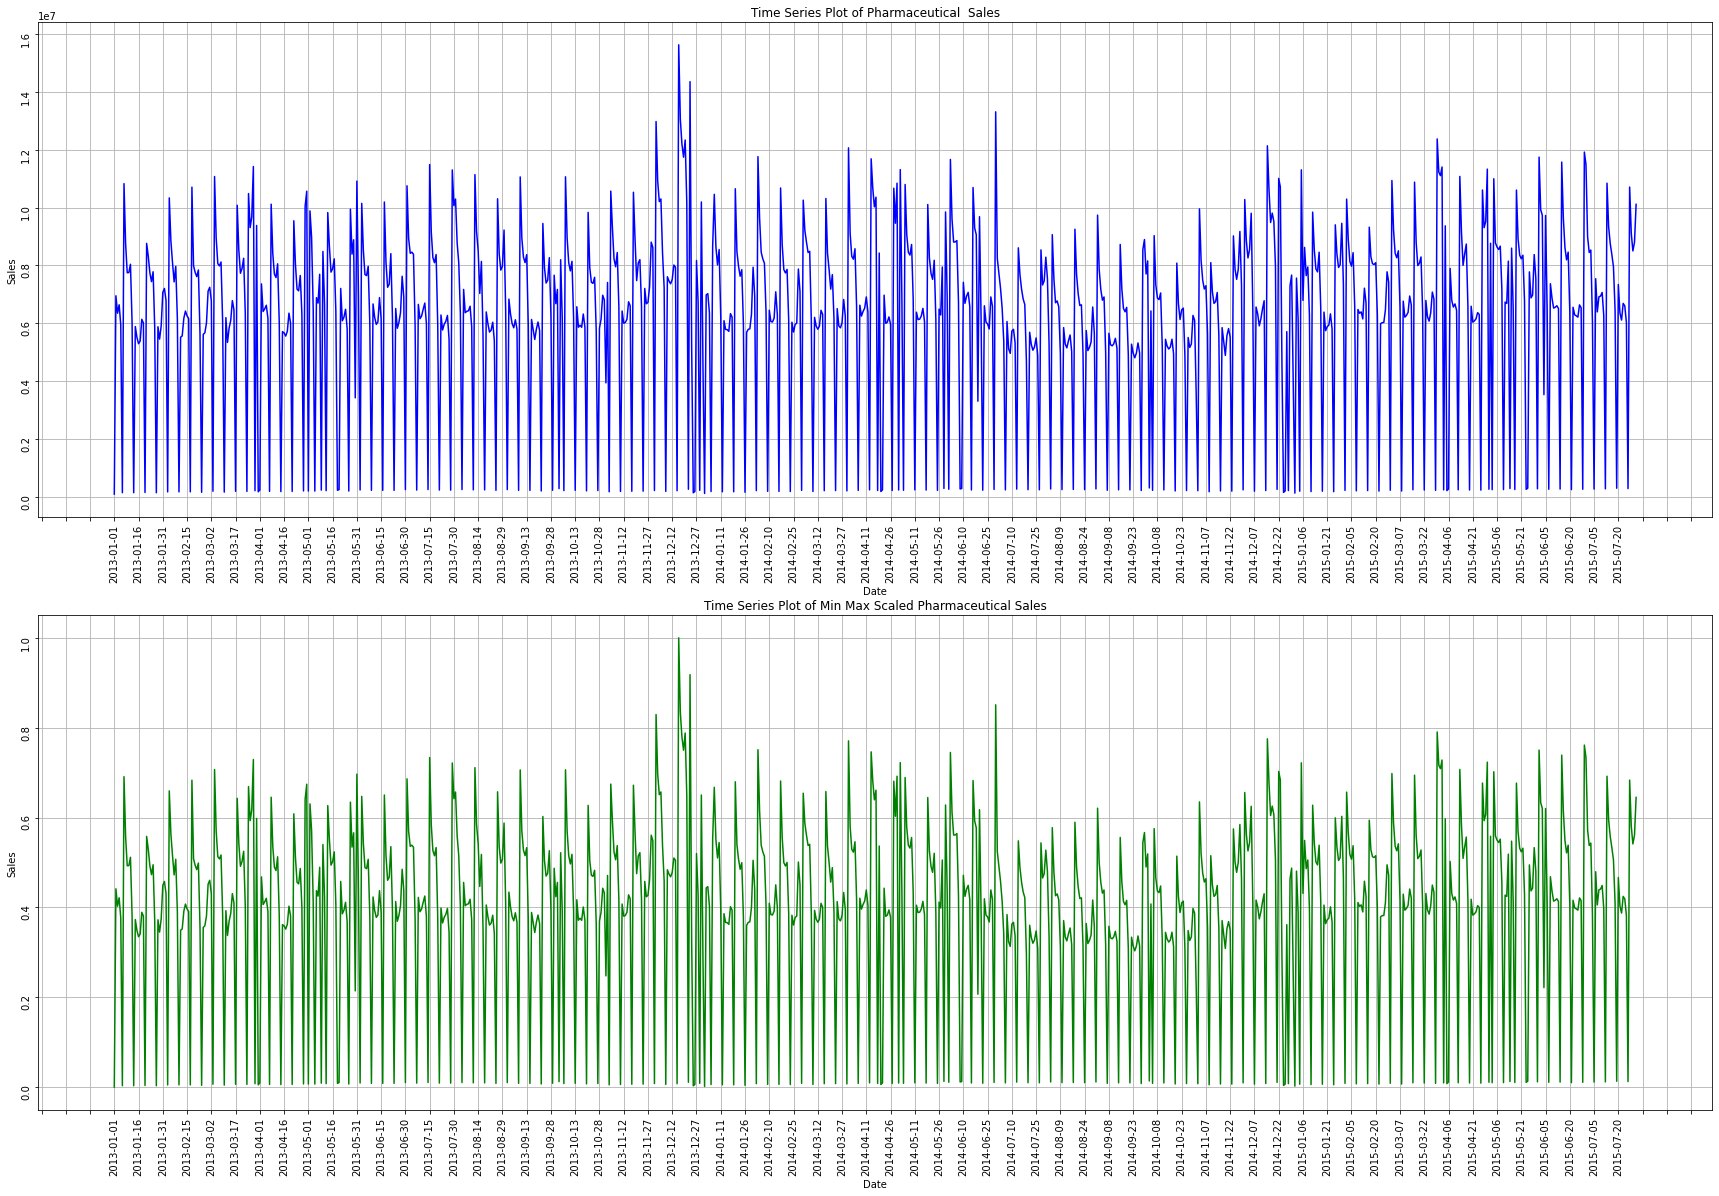

In [29]:

fig = plt.figure()
gs = GridSpec(2, 1, figure=fig)

fig.set_figheight(20)
fig.set_figwidth(30)
fig.tight_layout(pad=15)

M = 100
xticks = ticker.MaxNLocator(M)

ax1 = fig.add_subplot(gs[0,0])
ax1.plot(df.index, df.Sales, 'b-')
ax1.xaxis.set_major_locator(xticks)
ax1.tick_params(labelrotation=90)
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales')
ax1.title.set_text('Time Series Plot of Pharmaceutical  Sales')
ax1.grid(True)

ax2 = fig.add_subplot(gs[1,0])
ax2.plot(df.index, df.SalesScaled, 'g-')
ax2.xaxis.set_major_locator(xticks)
ax2.tick_params(labelrotation=90)
ax2.set_xlabel('Date')
ax2.set_ylabel('Sales')
ax2.title.set_text('Time Series Plot of Min Max Scaled Pharmaceutical Sales')
ax2.grid(True)
plt.show()

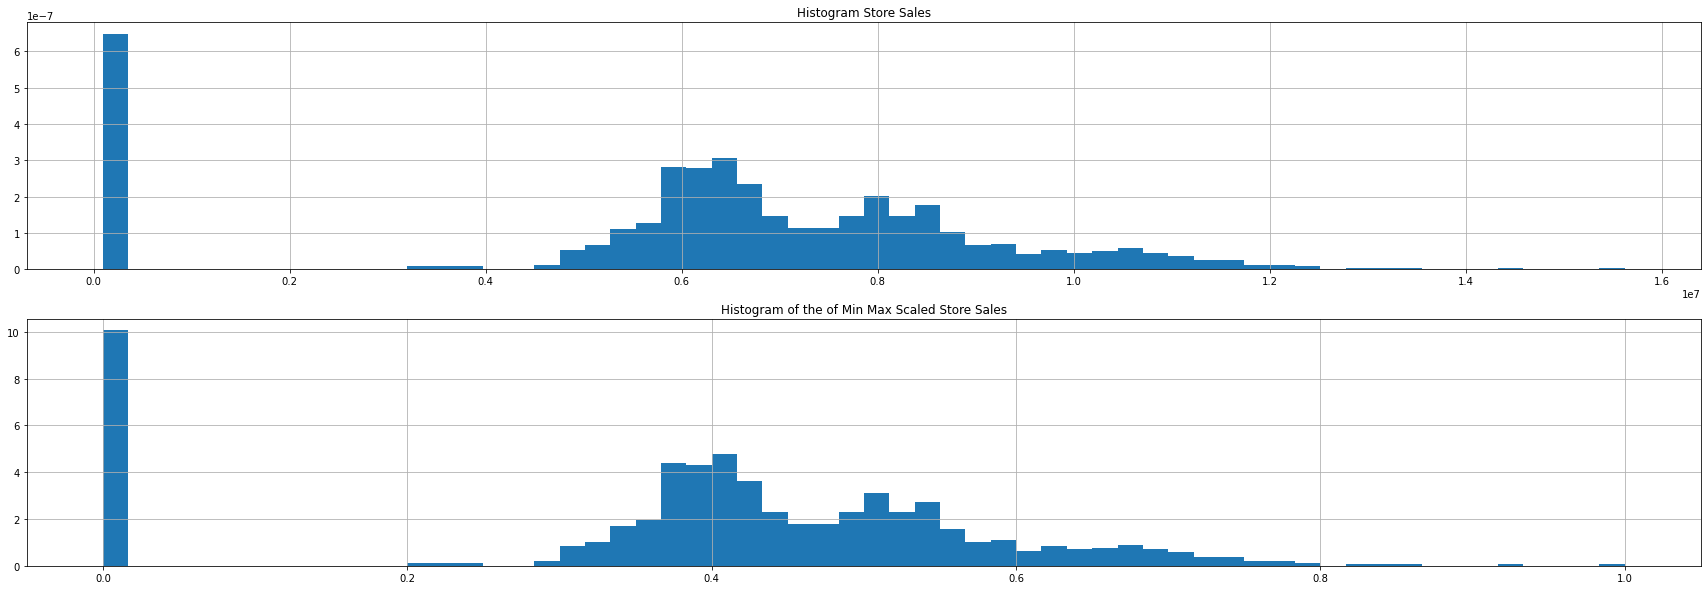

In [30]:
fig = plt.figure()
gs = GridSpec(2, 1, figure=fig)

fig.set_figheight(10)
fig.set_figwidth(30)
fig.tight_layout(pad=6)

ax1 = fig.add_subplot(gs[0,0])
ax1.hist(df.Sales, density=True, bins=60)
ax1.title.set_text('Histogram Store Sales')
ax1.grid(True)

ax2 = fig.add_subplot(gs[1,0])
ax2.hist(df.SalesScaled, density=True, bins=60)
ax2.title.set_text('Histogram of the of Min Max Scaled Store Sales')
ax2.grid(True)
plt.show()

# Unit Root Tests.

Unit Root Tests helps us determine the stationarity of our data

In [31]:
adfResult = adfuller(df.Sales.values, autolag='AIC')
print(f'ADF Statistic: {adfResult[0]}')
print(f'p-value: {adfResult[1]}')

ADF Statistic: -4.761614524595612
p-value: 6.436731330559376e-05


In [32]:

adfResult = adfuller(df.SalesScaled.values, autolag='AIC')
print(f'ADF Statistic: {adfResult[0]}')
print(f'p-value: {adfResult[1]}')

ADF Statistic: -4.761614524595613
p-value: 6.436731330559359e-05


## Removing Stationarity

The trend can be removed from the observations, then added back to forecasts later to return the prediction to the original scale and calculate a comparable error score.

A standard way to remove a trend is by differencing the data. That is the observation from the previous time step (t-1) is subtracted from the current observation (t). This removes the trend and we are left with a difference series, or the changes to the observations from one time step to the next.

In [33]:

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return pd.Series(diff)

In [34]:

SalesDif = difference(df.SalesScaled.values)

In [37]:

SalesDif = difference(df.SalesScaled.values)

In [38]:

SalesDif

0      0.441354
1     -0.038773
2      0.018751
3     -0.044271
4     -0.374055
         ...   
936    0.671211
937   -0.102550
938   -0.039617
939    0.019251
940    0.084430
Length: 941, dtype: float64

## Autocorrelations and Partial Autocorrelations Plots.

We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.

In [39]:
acfSalesScaled = acf(df.SalesScaled.values, fft=True, nlags=40)
acfSalesScaledNp = np.array(acfSalesScaled)

In [40]:
def corrPlots(array: np.array, prefix: str):
    plt.figure(figsize=(30, 5))
    plt.title(f"{prefix}  Autocorrelations of House Sales Min Max Scaled")
    plt.bar(range(len(array)), array)
    plt.grid(True)
    plt.show()

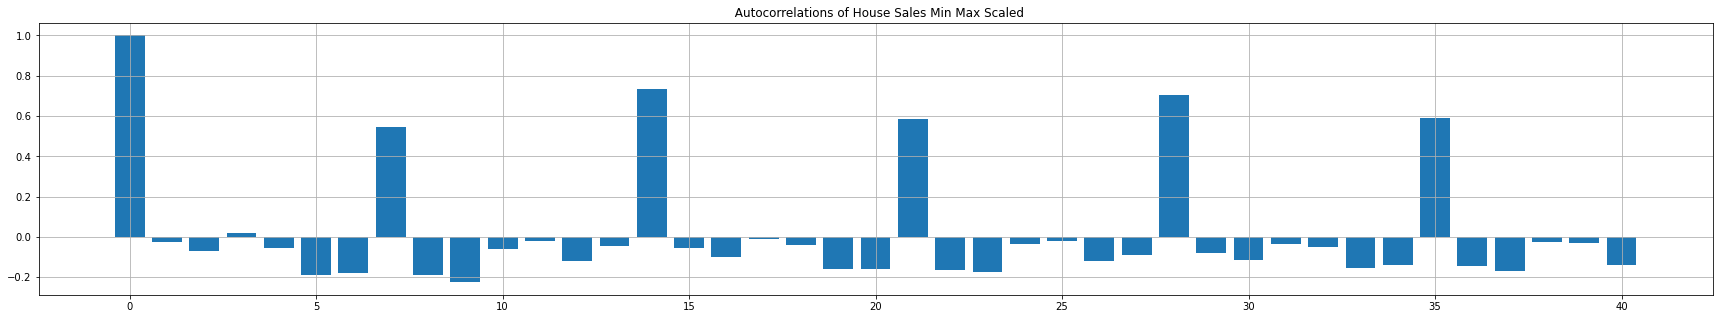

In [41]:
corrPlots(acfSalesScaledNp, '')


A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed

In [42]:
pacfSalesScaled = pacf(df.SalesScaled.values, nlags=40)
pacfSalesScaledNp = np.array(pacfSalesScaled)

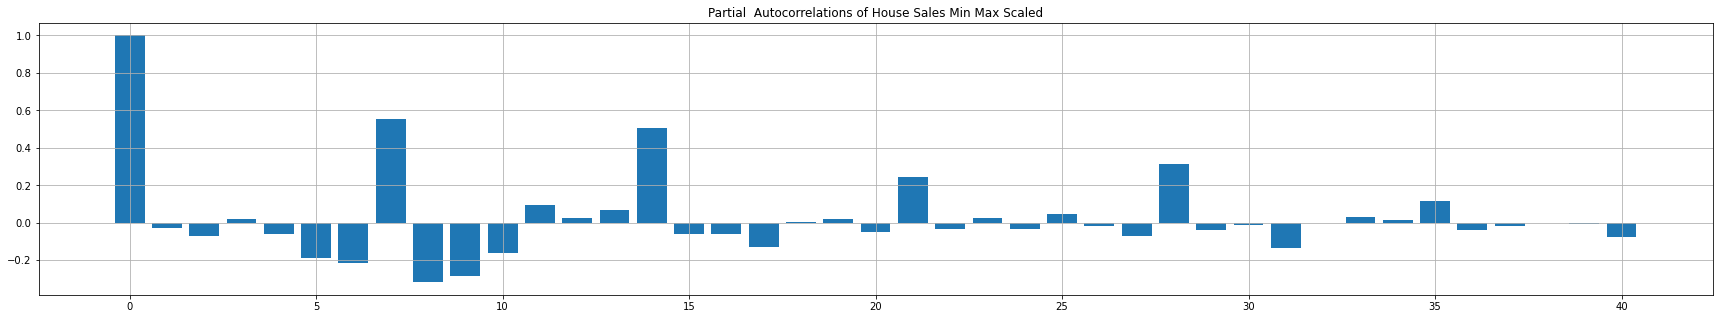

In [43]:
corrPlots(pacfSalesScaledNp, "Partial")

## Separating into a Training and Validation Set Fomat to Use Feed into LSTM

In [44]:
SIZE = len(df.SalesScaled)
WINDOW_SIZE = 48
BATCH_SIZE= SIZE-WINDOW_SIZE*2
EPOCHS = 200

In [45]:

DateTrain = df.index.values[0:BATCH_SIZE]
DateValid = df.index.values[BATCH_SIZE:]
XTrain = df.SalesScaled.values[0:BATCH_SIZE].astype('float32')
XValid = df.SalesScaled.values[BATCH_SIZE:].astype('float32')

# Obtain shapes for vectors of size (,1) for dates series

DateTrain = np.reshape(DateTrain, (-1, 1))
DateValid = np.reshape(DateValid, (-1, 1))

print("Shape of the training set date series: ", DateTrain.shape)
print("Shape of the validation set date series: ", DateValid.shape)
print()
print("Shape of the training set logarithm of sales series: ", XTrain.shape)
print("Shape of the validation set logarithm of sales series in a stateless LSTM: ", XValid.shape)

Shape of the training set date series:  (846, 1)
Shape of the validation set date series:  (96, 1)

Shape of the training set logarithm of sales series:  (846,)
Shape of the validation set logarithm of sales series in a stateless LSTM:  (96,)


In [46]:
tf.random.set_seed(1234)
# add extra dimension
series = tf.expand_dims(XTrain, axis=-1)
series.shape

TensorShape([846, 1])

In [47]:
# create tensor from each individual element
dataset = tf.data.Dataset.from_tensor_slices(series)
dataset

<TensorSliceDataset shapes: (1,), types: tf.float32>

In [48]:
# takes a window_size + 1 chunk from the slices
dataset = dataset.window(WINDOW_SIZE + 1, shift=1, drop_remainder=True)

In [49]:
# Example of Window
datasetEx = tf.data.Dataset.from_tensor_slices(tf.range(10))
datasetEx = datasetEx.window(5, shift=1, drop_remainder=True)
for window in datasetEx:
    print([elem.numpy() for elem in window])

[0, 1, 2, 3, 4]
[1, 2, 3, 4, 5]
[2, 3, 4, 5, 6]
[3, 4, 5, 6, 7]
[4, 5, 6, 7, 8]
[5, 6, 7, 8, 9]


In [50]:
dataset = dataset.flat_map(lambda window: window.batch(WINDOW_SIZE + 1))

In [51]:
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))

In [52]:
def windowed_dataset(series, window_size=WINDOW_SIZE, batch_size=BATCH_SIZE): 
  series = tf.expand_dims(series, axis=-1)
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True) 
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [53]:
DatasetTrain = windowed_dataset(XTrain)
DatasetVal = windowed_dataset(XValid)

Define and Estimate the LSTM

In [54]:

model = Sequential()
model.add(LSTM(8, input_shape=[None, 1], return_sequences=True))
model.add(LSTM(4, input_shape=[None, 1]))
model.add(Dense(1))
model.compile(loss="huber_loss", optimizer='adam')

The Huber loss is chosen because it is quite robust for non linear regression models and models with non normal errors.

In [55]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 8)           320       
_________________________________________________________________
lstm_1 (LSTM)                (None, 4)                 208       
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 533
Trainable params: 533
Non-trainable params: 0
_________________________________________________________________


In [56]:
history = model.fit(DatasetTrain, epochs=EPOCHS, validation_data=DatasetVal, verbose=1)

Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 0.1526 - val_loss: 0.1735
Epoch 2/200
1/1 [==============================] - 0s 177ms/step - loss: 0.1475 - val_loss: 0.1680
Epoch 3/200
1/1 [==============================] - 0s 156ms/step - loss: 0.1426 - val_loss: 0.1626
Epoch 4/200
1/1 [==============================] - 0s 157ms/step - loss: 0.1378 - val_loss: 0.1574
Epoch 5/200
1/1 [==============================] - 0s 153ms/step - loss: 0.1332 - val_loss: 0.1523
Epoch 6/200
1/1 [==============================] - 0s 169ms/step - loss: 0.1288 - val_loss: 0.1475
Epoch 7/200
1/1 [==============================] - 0s 155ms/step - loss: 0.1245 - val_loss: 0.1427
Epoch 8/200
1/1 [==============================] - 0s 152ms/step - loss: 0.1203 - val_loss: 0.1382
Epoch 9/200
1/1 [==============================] - 0s 151ms/step - loss: 0.1163 - val_loss: 0.1338
Epoch 10/200
1/1 [==============================] - 0s 154ms/step - loss: 0.1124 - val_loss: 0.1295
Epoch 11/200

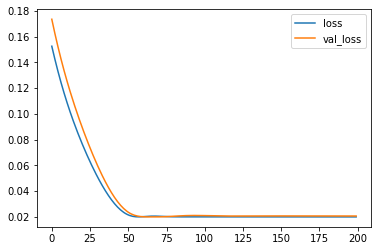

In [57]:
fig = plt.figure()
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

## Forecast the LSTM on the Validation Set and Assess Accuracy

In [60]:
def model_forecast(model, series, window_size):
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size, shift=1, drop_remainder=True) 
  ds = ds.flat_map(lambda w: w.batch(window_size))
  ds = ds.batch(SIZE).prefetch(1)
  forecast = model.predict(ds)
  return forecast

In [61]:
Forecast = model_forecast(model, df.SalesScaled.values[:, np.newaxis], WINDOW_SIZE)
Results = Forecast[BATCH_SIZE-WINDOW_SIZE:-1]
Results1 = scaler.inverse_transform(Results.reshape(-1,1))
XValid1 = scaler.inverse_transform(XValid.reshape(-1,1))

A state is: Where am I now inside a sequence? Which time step is it? How is this particular sequence behaving since its beginning up to now?

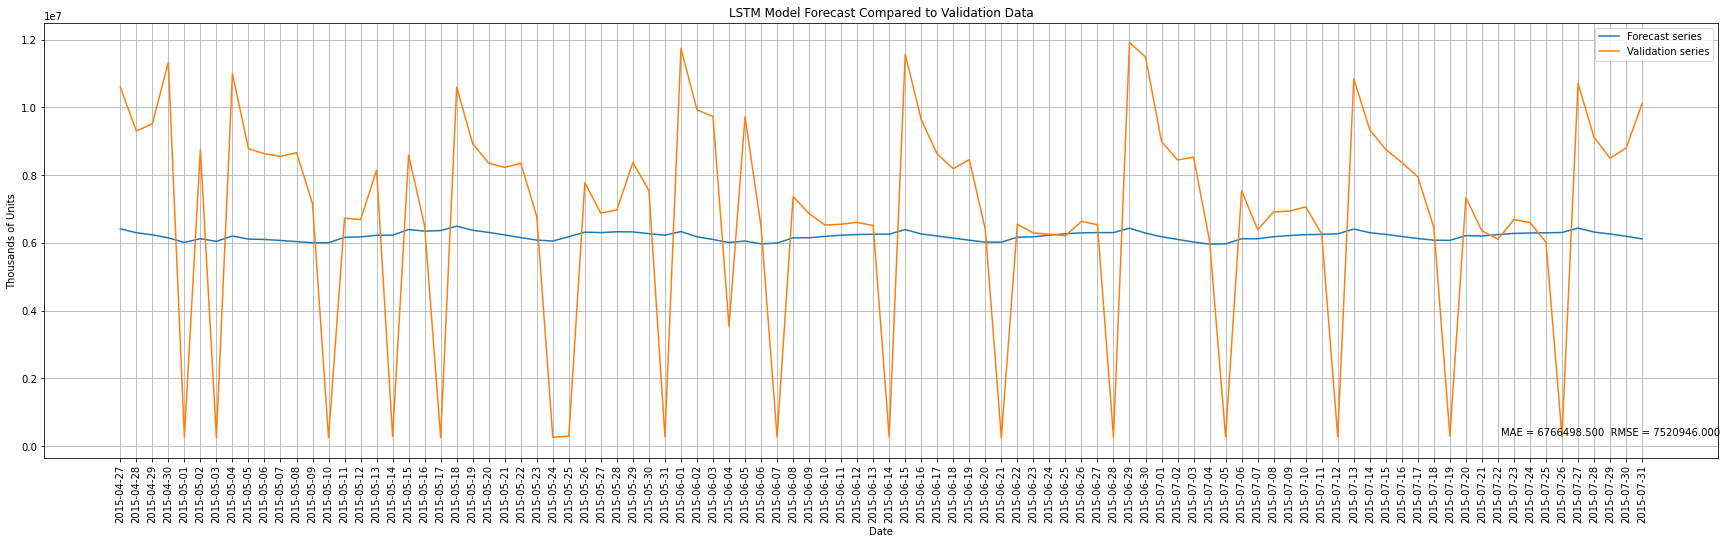

In [62]:
plt.figure(figsize=(30, 8))
plt.title("LSTM Model Forecast Compared to Validation Data")
plt.plot(DateValid.astype('datetime64'), Results1, label='Forecast series')
plt.plot(DateValid.astype('datetime64'), np.reshape(XValid1, (2*WINDOW_SIZE, 1)), label='Validation series')
plt.xlabel('Date')
plt.ylabel('Thousands of Units')
plt.xticks(DateValid.astype('datetime64')[:,-1], rotation = 90) 
plt.legend(loc="upper right")

MAE = tf.keras.metrics.mean_absolute_error(XValid1[:,-1], Results[:,-1]).numpy()
RMSE = np.sqrt(tf.keras.metrics.mean_squared_error(XValid1[:,-1], Results[:,-1]).numpy())

textstr = "MAE = " + "{:.3f}".format(MAE) + "  RMSE = " + "{:.3f}".format(RMSE)

# place a text box in upper left in axes coords
plt.annotate(textstr, xy=(0.87, 0.05), xycoords='axes fraction')
plt.grid(True)

plt.show()

In [63]:
print(textstr)

MAE = 6766498.500  RMSE = 7520946.000
